In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv('../data/National_Greenhouse_Gas_Emissions_Inventories_and_Targets.csv')
df['ISO2'] = df['ISO2'].replace(np.nan, 'ZZ')
df = df.drop(columns=['ObjectId', "ISO3", "Indicator", "Unit", "Source", "CTS_Name", "CTS_Full_Descriptor", "Scale", 'F2022', 'F2023', 'F2024', 'F2025',
       'F2026', 'F2027', 'F2028', 'F2029', 'F2030'])
df = df[df['Gas_Type'].isin(["Carbon dioxide", "Greenhouse gas"])]

In [4]:
df.shape

(9103, 57)

In [61]:
df[(df['Country']=="World") & (df["Industry"]=="Energy") &(df["Gas_Type"] == "Carbon dioxide")]['F2021']

20114    34215.34431
Name: F2021, dtype: float64

In [62]:
df[(df['Country']=="World") & (df["CTS_Code"]=="ECNGDE") &(df["Gas_Type"] == "Greenhouse gas")]['F2021']

20201    51402.52318
Name: F2021, dtype: float64

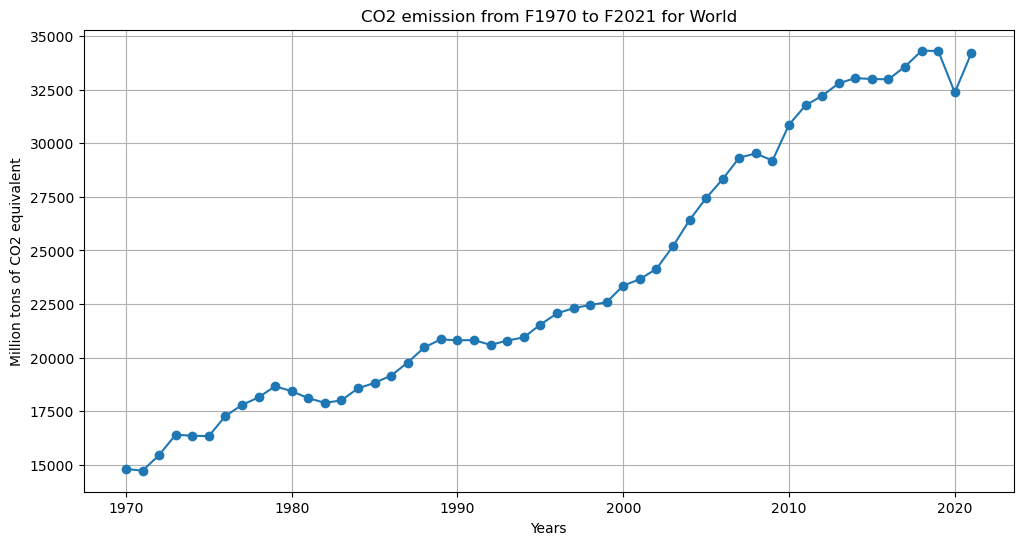

In [5]:
years = [int(x[1:]) for x in df.columns[5:].to_list()]
country = "World"
row = df[(df['Country']==country) & (df["Industry"]=="Energy") &(df["Gas_Type"] == "Carbon dioxide")]
values = row.iloc[0, 5:].astype(float)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title('CO2 emission from F1970 to F2021 for '+country)
plt.xlabel('Years')
plt.ylabel('Million tons of CO2 equivalent')
plt.grid(True)
plt.show()

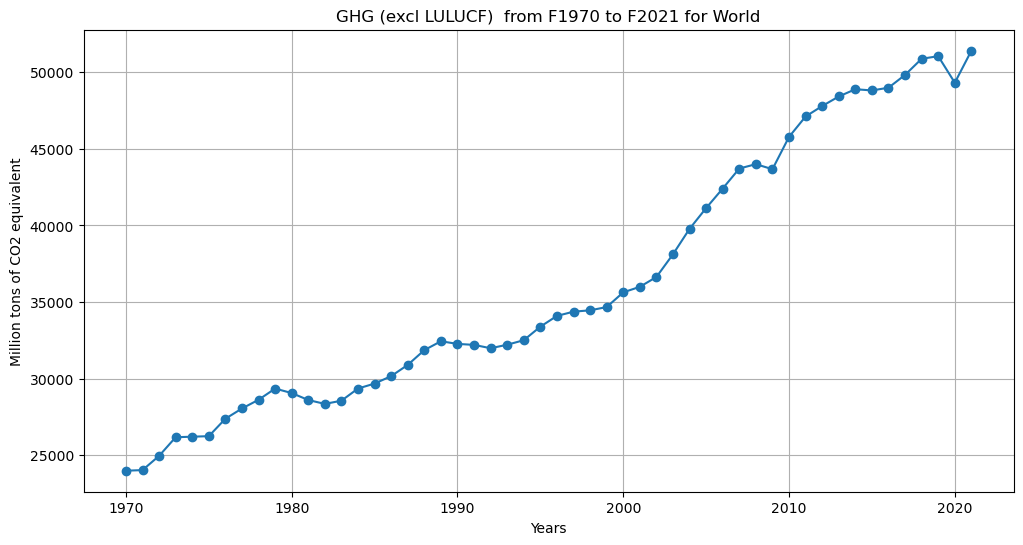

In [6]:
years = [int(x[1:]) for x in df.columns[5:].to_list()]
country = "World"
row = df[(df['Country']=="World") & (df["CTS_Code"]=="ECNGDE") &(df["Gas_Type"] == "Greenhouse gas")]
values = row.iloc[0, 5:].astype(float)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title('GHG (excl LULUCF)  from F1970 to F2021 for '+country)
plt.xlabel('Years')
plt.ylabel('Million tons of CO2 equivalent')
plt.grid(True)
plt.show()

In [101]:
df[(df['Country']=="World") & (df["CTS_Code"]=="ECNGDE") &(df["Gas_Type"] == "Greenhouse gas")]['F2021']

20201    51402.52318
Name: F2021, dtype: float64

In [102]:
df.head(10)

,Country,ISO2,CTS_Code,Industry,Gas_Type,F1970,F1971,F1972,F1973,F1974,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Advanced Economies,ZZ,ECNGDR,Agriculture,Carbon dioxide,20.880609,20.901782,21.075596,21.496603,21.582896,...,25.791341,24.541533,24.839765,25.495113,25.384501,25.219571,24.679238,24.984129,25.102868,25.035774
1,Advanced Economies,ZZ,ECNGDR,Agriculture,Greenhouse gas,1033.088228,1040.842816,1047.925600,1060.981516,1079.694780,...,1116.607829,1161.170230,1173.418622,1179.377600,1167.459920,1172.242024,1180.337665,1178.929662,1148.431002,1143.352083
4,Advanced Economies,ZZ,ECNGDR,Buildings and other Sectors,Carbon dioxide,1954.799942,1966.157204,2027.906735,2043.195965,1936.555406,...,1370.820755,1456.717735,1384.945817,1392.701550,1363.344283,1368.896823,1417.215270,1414.019033,1348.438469,1384.787385
5,Advanced Economies,ZZ,ECNGDR,Buildings and other Sectors,Greenhouse gas,2021.344873,2027.309773,2085.520536,2100.021032,1992.549136,...,1399.933025,1487.569357,1413.996695,1421.939062,1391.414041,1397.201202,1446.085075,1442.810145,1375.845592,1412.660677
8,Advanced Economies,ZZ,ECNGDR,Chemical Industry,Carbon dioxide,96.097933,95.298869,102.700907,108.604969,109.820114,...,136.403178,140.894320,137.487325,144.251563,141.627654,147.149483,148.467374,149.584701,146.679753,149.489634
10,Advanced Economies,ZZ,ECNGDR,Chemical Industry,Greenhouse gas,339.342949,339.930963,349.192569,364.811088,377.513214,...,180.706853,180.885439,178.302707,183.342653,180.385873,188.357056,190.174015,186.170359,181.856993,184.935959
13,Advanced Economies,ZZ,ECNGDR,Domestic Aviation,Carbon dioxide,152.474641,157.686604,161.228552,165.738877,160.110751,...,174.189809,179.295701,178.008757,188.123414,198.129348,205.615820,208.178557,212.269544,137.232517,168.579423
14,Advanced Economies,ZZ,ECNGDR,Domestic Aviation,Greenhouse gas,153.774359,159.030445,162.602416,167.151289,161.475231,...,175.786870,180.927261,179.629372,189.833711,199.926865,207.481598,210.064127,214.197502,138.470331,170.116981
17,Advanced Economies,ZZ,ECNGDR,Domestic Navigation,Carbon dioxide,53.000663,56.428543,52.161697,54.255006,55.038725,...,71.156199,70.363176,58.722589,63.939137,71.352288,74.197541,71.536862,71.563635,61.158333,64.568267
18,Advanced Economies,ZZ,ECNGDR,Domestic Navigation,Greenhouse gas,53.538254,57.001535,52.692530,54.807444,55.598945,...,72.420233,71.628789,59.861014,65.213513,72.692010,75.569464,72.859144,72.874021,62.330750,65.802001


In [7]:
df.to_csv("../data/r/co2_cleaned.csv")